# Vetores, soma e multiplicação por escalar

Um vetor é uma classe de seguimentos orientados equipolentes. Se o seguimento orientado $AB$ pertence à classe de um vetor $\vec{v}$, existe um ponto $P$ tal que $\vec{v} = OP$, com $O$ sendo a origem. Neste caso podemos identificar o vetor $\vec{v}$ como sendo o próprio ponto $P$.

Logo continuamos representar vetores como pontos. Vejamos a seguir operações com vetores:

## Soma de vetores

Soma está associada com translação.

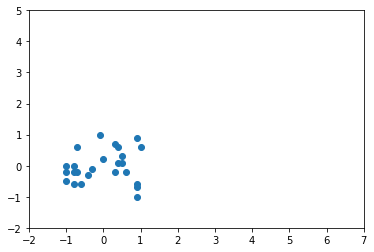

In [18]:
import random
import matplotlib.pyplot as plt

x_coordinates = [random.randint(-10, 10)/10 for _ in range(25)]
y_coordinates = [random.randint(-10, 10)/10 for _ in range(25)]

plt.scatter(x_coordinates, y_coordinates)
plt.xlim(-2,7)
plt.ylim(-2,5)
plt.show()

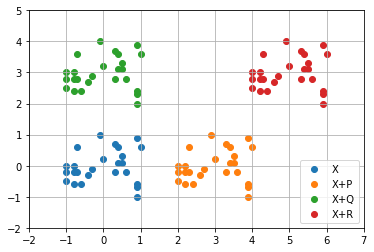

In [20]:
import random
import matplotlib.pyplot as plt

P = [3, 0]
Q = [0, 3]
R = [5, 3]

x_plus_P = [x + P[0] for x in x_coordinates]
y_plus_P = [y + P[1] for y in y_coordinates]

x_plus_Q = [x + Q[0] for x in x_coordinates]
y_plus_Q = [y + Q[1] for y in y_coordinates]

x_plus_R = [x + R[0] for x in x_coordinates]
y_plus_R = [y + R[1] for y in y_coordinates]

plt.scatter(x_coordinates, y_coordinates)
plt.scatter(x_plus_P, y_plus_P)
plt.scatter(x_plus_Q, y_plus_Q)
plt.scatter(x_plus_R, y_plus_R)
plt.legend(labels = ("X", "X+P", "X+Q", "X+R"), loc = 'lower right')
plt.xlim(-2,7)
plt.ylim(-2,5)
plt.grid("on")
plt.show()

## Multiplicação por escalar

Multiplicação por escalar está associada a homotetia.

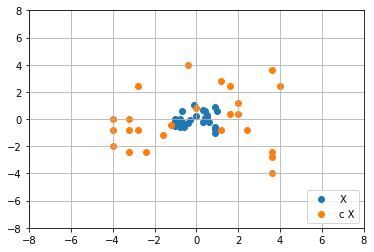

In [24]:
import random
import matplotlib.pyplot as plt

c = 4

x_scalar_c = [c * x for x in x_coordinates]
y_scalar_c = [c * y for y in y_coordinates]

plt.scatter(x_coordinates, y_coordinates)
plt.scatter(x_scalar_c, y_scalar_c)
plt.legend(labels = ("X", "c X"), loc = 'lower right')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.grid("on")
plt.show()

## Aplicação

Quando se trabalha com dados, suas representações podem estar em escalas e proporções impróprias para modelagem através de técnicas que se baseam em distribuições normais de probabilidade.

Vejamos um exemplo:

In [48]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["PRICE"] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Vejamos as colunas "NOX" e "TAX".

In [49]:
df[["NOX", "TAX"]].describe()

,NOX,TAX
count,506.000000,506.000000
mean,0.554695,408.237154
std,0.115878,168.537116
min,0.385000,187.000000
25%,0.449000,279.000000
50%,0.538000,330.000000
75%,0.624000,666.000000
max,0.871000,711.000000


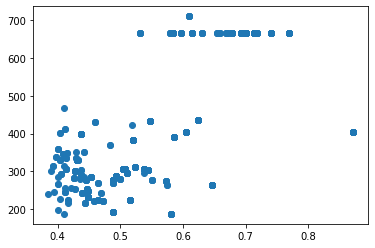

In [50]:
plt.scatter(df['NOX'], df['TAX'])
plt.show()

Enquanto uma varia de de 0.38 à 0.871, a outra varia de 187 à 711. Observe também os valores da média e do desvio padrão.

### Mantendo valores entre 0 e 1

In [53]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["PRICE"] = data.target
df["NOX"] = df["NOX"].map(lambda x: (x - df["NOX"].min())/(df["NOX"].max() - df["NOX"].min()))
df["TAX"] = df["TAX"].map(lambda x: (x - df["TAX"].min())/(df["TAX"].max() - df["TAX"].min()))
df[["NOX", "TAX"]].describe()

,NOX,TAX
count,506.000000,506.000000
mean,0.349167,0.422208
std,0.238431,0.321636
min,0.000000,0.000000
25%,0.131687,0.175573
50%,0.314815,0.272901
75%,0.491770,0.914122
max,1.000000,1.000000


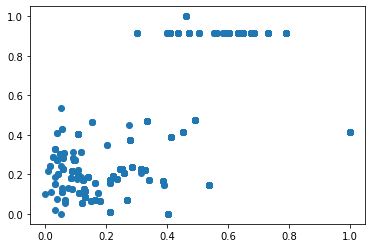

In [54]:
plt.scatter(df['NOX'], df['TAX'])
plt.show()

## Dentro de um círculo de raio 1

In [55]:
import numpy as np

df = pd.DataFrame(data.data, columns=data.feature_names)
df["PRICE"] = data.target
df["NOX"] = df["NOX"].map(lambda x: x/np.linalg.norm(df["NOX"]))
df["TAX"] = df["TAX"].map(lambda x: x/np.linalg.norm(df["TAX"]))
df[["NOX", "TAX"]].describe()

,NOX,TAX
count,506.000000,506.000000
mean,0.036724,0.035376
std,0.025077,0.026949
min,0.000000,0.000000
25%,0.013850,0.014711
50%,0.033111,0.022866
75%,0.051722,0.076592
max,0.105176,0.083788


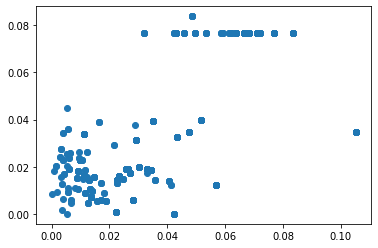

In [56]:
plt.scatter(df['NOX'], df['TAX'])
plt.show()

Com translação e homotetia preservamos as propriedades geométricas dos dados.